# Binding classification with XGBoost


----

- Cross validation using the all data

- Using all observations (all species, </=/> values too)

- simple one-hot encoding scheme for all categorical variables (species, hla type/subtypes,sequence)

- This is the best i can do now


----

In [1]:
import os,sys
os.environ['THEANO_FLAGS']='device=cpu'

#my functions
sys.path.append('../')
from utils import load_all_data,my_xgb_cv_predict,plot_roc

#go to working dir
work_dir='/data/data1/ribli/mhc/'
os.chdir(work_dir)

%matplotlib inline

Using Theano backend.


### Load data

In [2]:
x,_,y_c=load_all_data(hla_representation='one-hot',
    species_representation='one-hot',
    seq_representation='one-hot')

Reading from file...
Creating representation...
Using  137654  training data points
Using  27680  testing data points
Done, It took: 11.3298170567 s


### Train

In [4]:
#model params
params = {'max_depth':20,
         'eta':0.05,
         'min_child_weight':5,
         'colsample_bytree':1,
         'subsample':1,
         'silent':1,
         'objective': "binary:logistic",
         'eval_metric': 'auc',
         'nthread':8}

y_pred=my_xgb_cv_predict(params,x,y_c,n_folds=5)

Will train until eval error hasn't decreased in 200 rounds.
[0]	train-auc:0.859734	eval-auc:0.838008
[500]	train-auc:0.979410	eval-auc:0.933963
[1000]	train-auc:0.989915	eval-auc:0.937781
[1500]	train-auc:0.994052	eval-auc:0.938540
Stopping. Best iteration:
[1796]	train-auc:0.995476	eval-auc:0.938744

Will train until eval error hasn't decreased in 200 rounds.
[0]	train-auc:0.859368	eval-auc:0.843489
[500]	train-auc:0.979377	eval-auc:0.932299
[1000]	train-auc:0.990323	eval-auc:0.935952
[1500]	train-auc:0.994303	eval-auc:0.937040
[2000]	train-auc:0.996418	eval-auc:0.937284
Stopping. Best iteration:
[2122]	train-auc:0.996780	eval-auc:0.937376

Will train until eval error hasn't decreased in 200 rounds.
[0]	train-auc:0.832714	eval-auc:0.814826
[500]	train-auc:0.979357	eval-auc:0.934396
[1000]	train-auc:0.990211	eval-auc:0.938438
[1500]	train-auc:0.994275	eval-auc:0.939174
Stopping. Best iteration:
[1568]	train-auc:0.994639	eval-auc:0.939283

Will train until eval error hasn't decreased in

### ROC plot

AUC: 0.929119911703


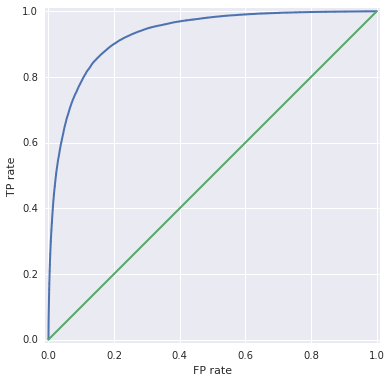

In [5]:
plot_roc(y_c,y_pred)